In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
california = datasets.fetch_california_housing()
calData = pd.DataFrame(california.data, columns = california.feature_names)
y = california.target
X = california.data


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [4]:
# Importing Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR, LinearSVR

In [56]:
regressores = [
    LinearRegression(),
    KNeighborsRegressor(),
    KNeighborsRegressor(n_neighbors=8,metric='manhattan'),
    GaussianProcessRegressor(),
    SVR(),
    LinearSVR(),
    #SVR(kernel='linear'),
    RANSACRegressor()
]
modelNames = ['LinReg', 'KNR', 'KNR2', 'GPR', 'SVR', 'LinSVR', 'RANSAC']

In [6]:
from sklearn import metrics
from time import time

In [7]:
resList = []
for model in regressores:
    start = time()
    model.fit(X_train, y_train)
    train_time = time()-start
    start = time()
    prediction = model.predict(X_test)
    predict_time = time()-start
    resList.append([ model, train_time, predict_time, metrics.r2_score(y_test,prediction), metrics.explained_variance_score(y_test,prediction), metrics.mean_absolute_error(y_test,prediction) ])
    print(model)
Res = pd.DataFrame(resList, columns = ['model', 'train time', 'predict time', 'R2 metric', 'Variance Score', 'MAE'])



LinearRegression()
KNeighborsRegressor()
KNeighborsRegressor(metric='manhattan', n_neighbors=8)
GaussianProcessRegressor()
SVR()
LinearSVR()
RANSACRegressor()


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [57]:
Res["ModelName"] = modelNames

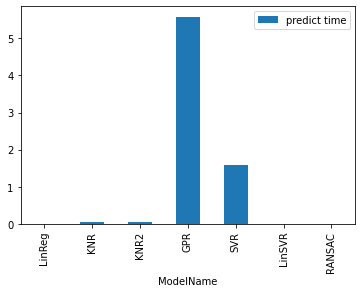

In [58]:
fig = Res.plot(x = 'ModelName', y = "predict time", kind = 'bar').get_figure()
fig.savefig('PredictTime.pdf')

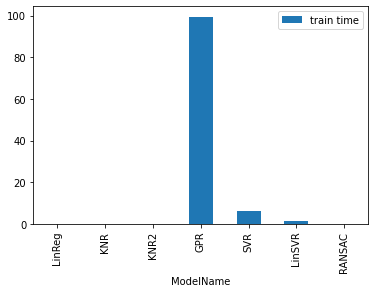

In [59]:
fig = Res.plot(x = 'ModelName', y = ["train time"], kind = 'bar').get_figure()
fig.savefig('TrainTime.pdf')

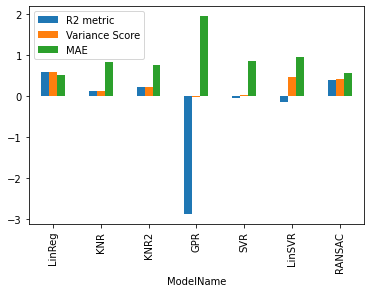

In [60]:
fig = Res.plot(x = 'ModelName', y = ['R2 metric', 'Variance Score', 'MAE'], kind = 'bar').get_figure()
fig.savefig('Errors.pdf')